## DSBDAL Assignment 3

## Descriptive statistics

#### Importing required libraries

In [137]:
import pandas as pd
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


### Part 1

In [138]:
data = pd.read_csv('nba.csv')
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [139]:
nan_value = float("NaN")
## Converting the empty strings into a NaN format 
data.replace("", nan_value, inplace=True)
## Replacing missing price with mean of price
data.Age.replace(nan_value,data.Age.mean(),inplace=True)
data.Salary.replace(nan_value,data.Salary.mean(),inplace=True)

In [140]:
data['Age'].max()

40.0

In [141]:
data['Age'].min()

19.0

In [142]:
l = {"19-24.5":"one","24.5-29.5":"two","29.5-34.75":"three","34.75-40":"four"}

In [143]:
data.Age = data.Age.astype(int)

In [144]:
## Performing the categorical separation 
data['Age'] = data['Age'].mask(data['Age'].between(19,24.5), 1) 
data['Age'] = data['Age'].mask(data['Age'].between(24.5,29.5), 2)
data['Age'] = data['Age'].mask(data['Age'].between(24.5,34.75), 3)
data['Age'] = data['Age'].mask(data['Age'].between(34.75,40.5), 4)

In [145]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,2,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,2,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,2,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,1,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,2,6-10,231.0,NaN,5.000000e+06


In [146]:
data.Age = data.Age.astype(str)

In [147]:
def process(text):
    text = text.replace('1', l["19-24.5"]).replace('2',l['24.5-29.5']).replace('3', l['29.5-34.75']).replace('4', l['34.75-40'])
    text = text.encode("utf8").decode("ascii",'ignore')
    text = " ".join(text.split())
    return text

data.Age = data.Age.apply(process)

In [148]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,two,6-2,180.0,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99.0,SF,two,6-6,235.0,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30.0,SG,two,6-5,205.0,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28.0,SG,one,6-5,185.0,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8.0,PF,two,6-10,231.0,NaN,5.000000e+06


In [149]:
data.Age.value_counts() ## Check value counts of age categories

two      182
one      154
three     90
four      32
Name: Age, dtype: int64

In [150]:
temp = data.groupby("Age") 

#### Category one

In [151]:
temp.get_group('one')['Salary'].describe()

count    1.540000e+02
mean     2.761705e+06
std      3.164929e+06
min      3.088800e+04
25%      1.000000e+06
50%      1.721380e+06
75%      3.150510e+06
max      1.640750e+07
Name: Salary, dtype: float64

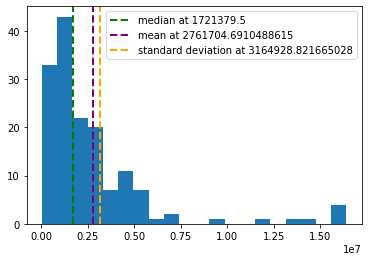

In [152]:
plt.hist(temp.get_group('one')['Salary'], bins=20)

measurements = [temp.get_group('one')['Salary'].median(),temp.get_group('one')['Salary'].mean(),temp.get_group('one')['Salary'].std()]
names = ["median", "mean","standard deviation"]
colors = ['green', 'purple', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.0, c=color,label='{0} at {1}'.format(name, measurement))
plt.legend();
plt.show()


#### Category two

In [153]:
temp.get_group('two')['Salary'].describe()

count    1.820000e+02
mean     5.674704e+06
std      5.472129e+06
min      5.572200e+04
25%      1.051400e+06
50%      3.664474e+06
75%      8.866574e+06
max      2.015862e+07
Name: Salary, dtype: float64

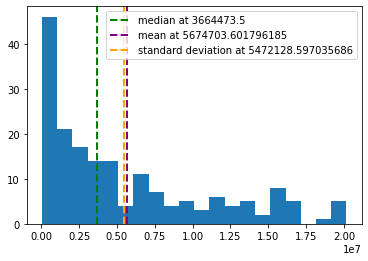

In [154]:
plt.hist(temp.get_group('two')['Salary'], bins=20)

measurements = [temp.get_group('two')['Salary'].median(),temp.get_group('two')['Salary'].mean(),temp.get_group('two')['Salary'].std()]
names = ["median", "mean","standard deviation"]
colors = ['green', 'purple', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.0, c=color,label='{0} at {1}'.format(name, measurement))
plt.legend();
plt.show()


#### Category three

In [155]:
temp.get_group('three')['Salary'].describe()

count    9.000000e+01
mean     7.059559e+06
std      6.112519e+06
min      2.006000e+05
25%      2.312500e+06
50%      5.209584e+06
75%      1.005277e+07
max      2.297050e+07
Name: Salary, dtype: float64

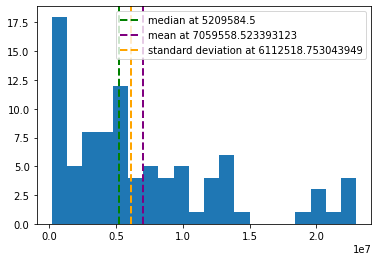

In [156]:
plt.hist(temp.get_group('three')['Salary'], bins=20)

measurements = [temp.get_group('three')['Salary'].median(),temp.get_group('three')['Salary'].mean(),temp.get_group('three')['Salary'].std()]
names = ["median", "mean","standard deviation"]
colors = ['green', 'purple', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.0, c=color,label='{0} at {1}'.format(name, measurement))
plt.legend();
plt.show()


#### Category four

In [157]:
temp.get_group('four')['Salary'].describe()

count    3.200000e+01
mean     3.890327e+06
std      4.495571e+06
min      2.228880e+05
25%      9.472760e+05
50%      2.877470e+06
75%      4.882013e+06
max      2.500000e+07
Name: Salary, dtype: float64

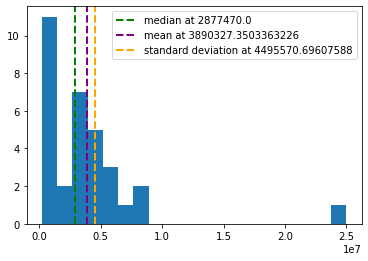

In [158]:
plt.hist(temp.get_group('four')['Salary'], bins=20)

measurements = [temp.get_group('four')['Salary'].median(),temp.get_group('four')['Salary'].mean(),temp.get_group('four')['Salary'].std()]
names = ["median", "mean","standard deviation"]
colors = ['green', 'purple', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.0, c=color,label='{0} at {1}'.format(name, measurement))
plt.legend();
plt.show()


### Part 2

In [159]:
data = pd.read_csv('iris_final.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [160]:
data.drop('Id',axis='columns', inplace=True)

In [161]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [162]:
data.Species.value_counts() # Various species 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [163]:
temp = data.groupby("Species") # Grouping by species 

#### 1. For iris-setosa

In [164]:
temp.get_group('Iris-setosa').describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


<AxesSubplot:xlabel='SepalLengthCm'>

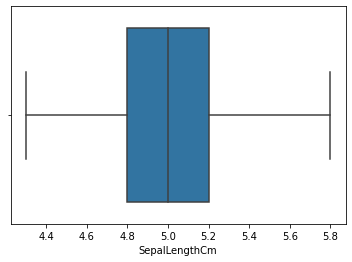

In [165]:
temp2 = temp.get_group('Iris-setosa')
sns.boxplot(x= temp2['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

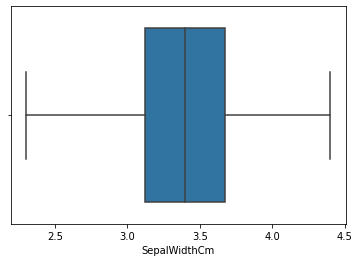

In [166]:
sns.boxplot(x= temp2['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

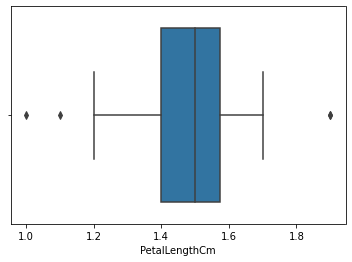

In [167]:
sns.boxplot(x= temp2['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

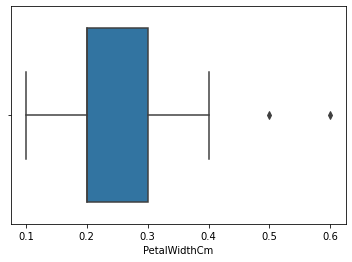

In [168]:
sns.boxplot(x= temp2['PetalWidthCm'])

#### 2. For iris-versicolor

In [169]:
temp.get_group('Iris-versicolor').describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


<AxesSubplot:xlabel='SepalLengthCm'>

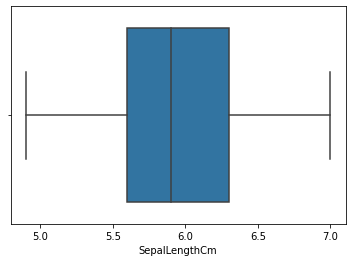

In [170]:
temp3 = temp.get_group('Iris-versicolor')
sns.boxplot(x= temp3['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

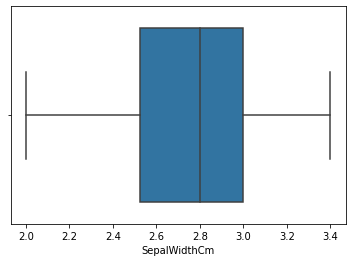

In [171]:
sns.boxplot(x= temp3['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

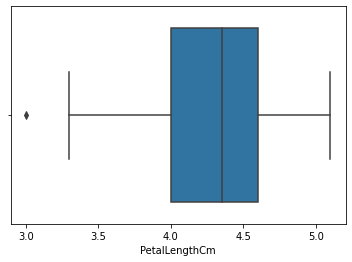

In [172]:
sns.boxplot(x= temp3['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

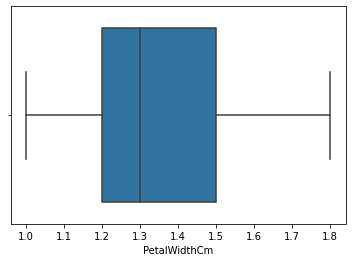

In [173]:
sns.boxplot(x= temp3['PetalWidthCm'])

#### 2. For iris-virginica

In [174]:
temp.get_group('Iris-virginica').describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


<AxesSubplot:xlabel='SepalLengthCm'>

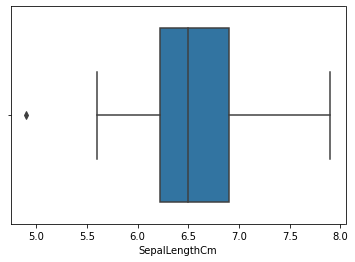

In [175]:
temp4 = temp.get_group('Iris-virginica')
sns.boxplot(x= temp4['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

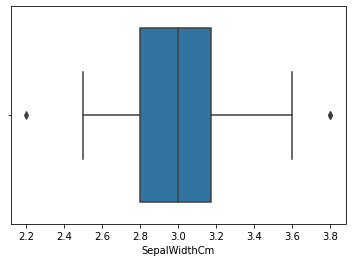

In [176]:
sns.boxplot(x= temp4['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

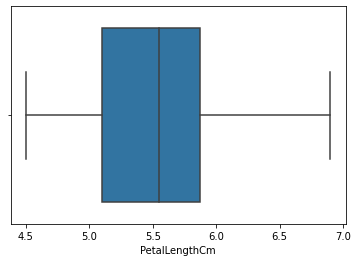

In [177]:
sns.boxplot(x= temp4['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

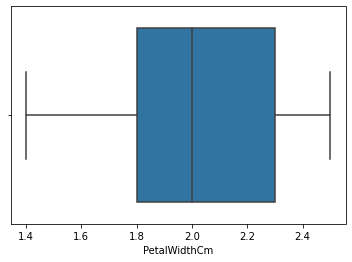

In [178]:
sns.boxplot(x= temp4['PetalWidthCm'])